This ws for creating the training set for batch job 4. The merged lenses were created in this notebook then viewed in this notebook and dim lenses were hand picked to be sent to "h5/hand_selected/"

In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:90% !important;}</style>'))


In [5]:
import numpy as np
ims = np.load('h5/hand_selected/etg_pos_d_aug.npy')

curr num 47 next=1, exit=05


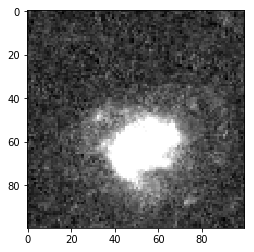

In [ ]:
##### quickly view some images
'''
This cell allows for quick viewing of training examples that you've created. 
You can uncomment lines to plot the original images besided the finished product.
'''
from astropy.visualization import (ZScaleInterval, ImageNormalize)

import matplotlib.pyplot as plt
from IPython import display
import os
BRIGHT_PATH = "h5/hand_selected/crowded_b/crowded_b3_"
DIM_PATH = "h5/hand_selected/crowded_d/crowded_d3_"
ims1 = ims
# ims2 = all_cutouts
# ims3 =new 
sp=int(input("start position"))
for i in range(len(ims1)):
    exit=False
    


    while(1):

        display.clear_output(wait=True)

#         fig = plt.figure()
#         ax1 = fig.add_subplot(1,3,2)
#         norm = ImageNormalize(ims1[i+sp][0], interval = ZScaleInterval())
#         ax1.imshow(ims1[i+sp][0],norm=norm)

#         ax2 = fig.add_subplot(1,3,1)
#         ax2.imshow(np.log10(ims1[i+sp][0]+1))

#         ax3 = fig.add_subplot(1,3,3)
#         ax3.imshow((ims1[i+sp][0]))
#         plt.pause(0.01)
        
        ans = int(input("curr num "+str(i+sp)+" next=1, exit=0"))
        plt.imshow((ims1[i+sp][0]))#,cmap='gray') 
        norm = ImageNormalize(ims1[i+sp][0], interval = ZScaleInterval())
        plt.imshow(ims1[i+sp][0],norm=norm, cmap='gray')
        plt.pause(0.01)

        
        
        
        
        if ans ==5:
            break
        if ans==0:
            exit=True
            break
        if ans==7:
            fits.writeto(BRIGHT_PATH+str(sp)+"_" +str(i)+'.fits',ims1[i+sp][0], header=None, overwrite =True)
            break
        if ans==9:
            fits.writeto(DIM_PATH+str(sp)+"_" +str(i)+'.fits',ims1[i+sp][0], header=None, overwrite =True)
            break
    if exit==True:
        break
 #     plt.imshow(np.log10(ims1[i+sp][0]),cmap='gray') 
#     fig = plt.figure()
#     ax1 = fig.add_subplot(1,3,2)
#     ax1.set_title("Original")
#     ax1.imshow(ims2[i+sp][0],cmap='gray')
#     ax2 = fig.add_subplot(1,3,1)
#     ax2.set_title("Old")
#     ax2.imshow(ims1[i+sp][0],cmap='gray')
#     ax3 = fig.add_subplot(1,3,3)
#     ax3.set_title("New")
#     ax3.imshow(ims3[i+sp][0],cmap='gray')       

# 900*16

In [15]:
# MERGE AND SAVE catalog images

'''
This merges and normalizes simulated lesness with real images. Specify the paths to files that you want to merge(OUT_PATH). You can specify '1' for images that
come from the Grazian catalog (more noisy) and 2 for images that were found to be false positives from detection. The only difference will be that the 
catalog images are combined with a higher lens:real_image ratio. Save images to a folder when done (MERGED_PATH).
'''

import os
from astropy.convolution import convolve, Gaussian2DKernel
from astropy.nddata.utils import Cutout2D
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from astropy.convolution import convolve, Gaussian2DKernel
import random


hm_lenses = int(input("How many lenses do you want to merge with associated cutouts? "))
catalog = int(input("1 = catalog, 2 = false positives from detections "))

if catalog ==1:
    LENSES_PATH = "/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/lenses_h2/l_"
    OUT_PATH = "/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/positive_cutout/o_"
    MERGED_PATH = "/data/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/h5/merged_h5/m_h5_"
else:
    LENSES_PATH =  "/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/old_datasets/large_lenses/l_"
    OUT_PATH = "/data/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/h4/class_3_n/"
    MERGED_PATH = "/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/h5/class_3_p_merged/c3p_norm_"
#     LENSES_PATH = "/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/lenses_h2/l_"#/old_datasets/large_lenses/l_"
#     OUT_PATH = "/data/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/etg/old/"
#     MERGED_PATH = "/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/etg/etg_merged/etg_merged_"


#calculate standard deviation from full width half maximum and create gaussian kernel
FWHM = 0.986 #dealing in pixels
sigma = FWHM  / ( 2*np.sqrt(2*np.log(2)) )
gauss_kernel = Gaussian2DKernel(sigma)

def normalize( all_cutouts, all_lenses, hm_lenses): #only for 1 color channel. Scale both (0,1)
    for lens_number in range(hm_lenses):
        try:
            max_val = all_cutouts[lens_number][0][30:70,30:70].max()
            
            if catalog==1:

                alpha = [max_val*float(random.randint(10,18))/100.,
                         max_val*float(random.randint(10,18))/100.,
                         max_val*float(random.randint(10,18))/100.,
                         max_val*float(random.randint(10,18))/100.]  
            else:    
                alpha = [max_val*float(random.randint(2,12))/100.,
                         max_val*float(random.randint(2,12))/100.,
                         max_val*float(random.randint(2,12))/100.,
                         max_val*float(random.randint(2,12))/100.]  


            for i in range(len(alpha)): 
                l = all_lenses[lens_number + hm_lenses*i][0]
                tmp_lens = l.reshape(-1,)                                        
                tmp_lens = minmax_scale(tmp_lens, feature_range = (0, 1))*alpha[i]     
                all_lenses[lens_number + hm_lenses*i][0] = tmp_lens.reshape(all_lenses.shape[2],all_lenses.shape[2])
                
                summed=np.add(all_cutouts[lens_number + hm_lenses*i][0], all_lenses[lens_number + hm_lenses*i][0])
#                 tmp_image = summed.reshape(-1,)
#                 tmp_image = minmax_scale(tmp_image, feature_range = (0,1))
#                 summed = tmp_image.reshape(summed.shape[0],summed.shape[1])
                
                save_image(lens_number + hm_lenses*i, summed)
        except:
            print ("unable to noramlize and add new")
            
        

def load_images(sample_num): 
    if catalog==1:
        cutout = fits.open(OUT_PATH+ str(sample_num)+".fits")[0].data 
    else:
        cutout = fits.open(OUT_PATH+ filenames[sample_num])[0].data 
    
    lens = fits.open(LENSES_PATH+str(sample_num+1000)+".fits")[0].data 
    lens = convolve(lens, gauss_kernel) #convolve with PSF

    cutout = cutout.reshape(1,cutout.shape[0],cutout.shape[1])
    lens = lens.reshape(1,lens.shape[0],lens.shape[1])
    return cutout, lens

def save_image(image_number, merged):
    fits.writeto(MERGED_PATH + str(image_number)+'.fits', merged, overwrite =True) 
    
def verify(num):
    os.system('sextractor  /data/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/positive_cutout/o_'+str(num)+'.fits -c default1.se -CATALOG_NAME my_catalog.cat')
    tp_se =np.loadtxt('my_catalog.cat')
    
    #corner cases
    if len((tp_se))==0: tp_se=np.zeros((1,15))#specific to when you have 15 params
    if len(np.shape(tp_se))==1: tp_se=np.reshape(tp_se,(1,15))

    for k1 in range(len(tp_se)):
        if (tp_se[k1,0]<67) & (tp_se[k1,0]>37) & (tp_se[k1,1]<67) & (tp_se[k1,1]>37):
            return True
    return False

all_cutouts = np.zeros((hm_lenses*4,1,100,100))
all_lenses = np.zeros((hm_lenses*4,1,100,100))


filenames = os.listdir(OUT_PATH)

bad_images = [] #keep track of and remove bad images later
for image in range(hm_lenses):
    try:
        #verify image has a central source
#         if verify(image)==False:
#             for i in range(4):
#                 bad_images.append(image+hm_lenses*i)
#             print("no central source: " +str(image))
#             continue
            
        #load each image into 4 spots in each respective array
        for weight in range(4):
            all_cutouts[image + hm_lenses*weight], all_lenses[image+hm_lenses*weight] = load_images(image)
    except:
        for i in range(4):
            bad_images.append(image+hm_lenses*i)
        print("couldnt find image: " +str(image))
    
hm_lenses -=len(bad_images)/4
all_cutouts = np.delete(all_cutouts,bad_images, axis=0)
all_lenses = np.delete(all_lenses,bad_images, axis=0)
    
print("images loaded") 
        
normalize(all_cutouts, all_lenses, hm_lenses) #must call this first before modifying all_cutouts
print("images normalized and summed")   




How many lenses do you want to merge with associated cutouts? 900
1 = catalog, 2 = false positives from detections 2
images loaded
images normalized and summed


# 

In [1]:
# load images from files
'''
Load images from their files. Each set of images should be kept in its own directory. Specify the path to this directory.
'''

import os 
from astropy.io import fits 
import numpy as np 
from sklearn.preprocessing import minmax_scale

# catalog = int(input("1 = catalog, 2 = false positives from detections "))

# if catalog==1:
#     PATH ="/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/h4/merged_h4/m_h4_"
# else:
#     PATH = "/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/h4/class_22_p_norm/c22p_norm_" 

PATH ='h5/se_pos_cutouts/'#"/data/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/h5/hand_selected/etg_pos_d/""
#'/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/h4/class_3_p_norm/'#"/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/etg/etg_merged_large_lenses/"
#"/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/test/" #h4/batchjob_3_multisource/"


ims = np.ones((len(os.listdir(PATH)), 1, 100, 100))
filenames = os.listdir(PATH)

count =0 
for filename in filenames: 
        pic = fits.open(PATH+filename)[0].data
#         pic = fits.open(PATH+str(filename)+".fits")[0].data#filename)[0].data

        if pic.shape != (100, 100):
            result = np.zeros((100,100))
            result[:pic.shape[1],:pic.shape[1]] = pic
            pic = result
            
        if np.isnan(pic).any()==True: #if any nan
            pic = np.nan_to_num(pic) #convert nan val to 0
            sky =3.*np.median(pic)- 2.*np.mean(pic)#calc sky now that there are no nan values
            pic[pic==0] = sky #convert 0 values to sky
            

        ims[count] = pic
        count+=1
    
print ims.shape, ims.max(), ims.min()


(1033, 1, 100, 100) 69.78776550292969 -0.10539313405752182


In [46]:
np.save('h5/batchjob_4_crowded',ims)

# 


In [23]:
# make negatives
'''
Similar to making the positive examples, but there is no merging with a simulated lens, just normalization.
'''

import os
from astropy.convolution import convolve, Gaussian2DKernel
from astropy.nddata.utils import Cutout2D
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from astropy.convolution import convolve, Gaussian2DKernel


IN_PATH = "/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/h_4/class_9/"
OUT_PATH = "/data/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/h5/class_9_aug/c9_aug_"

hm_lenses = int(input("How many lenses do you want to merge with associated cutouts? "))

            
def normalize_new( all_cutouts, hm_lenses): #only for 1 color channel. Scale both (0,1)
  
    try:
        for lens_number in range(hm_lenses): #array axis 0 = [..all one weight.., all another weight..

            #scale the cutouts
#             tmp_lens2 = all_cutouts[lens_number][0].reshape(-1,)                        #scale       
#             tmp_lens2 = minmax_scale(tmp_lens2, feature_range = (0,1))
#             all_cutouts[lens_number][0] = tmp_lens2.reshape(all_cutouts.shape[2],all_cutouts.shape[2])
            save_image_new(lens_number, all_cutouts[lens_number][0])

    except:
            print ("unable to noramlize and add")
 
        
def load_images(sample_num): #load images and psf convolve
    if catalog==1:
        cutout = fits.open(IN_PATH+ str(sample_num)+".fits")[0].data 
    else:
        cutout = fits.open(IN_PATH+ filenames[sample_num])[0].data 

    cutout = cutout.reshape(1,cutout.shape[0],cutout.shape[1])
    return cutout



def save_image_new(image_number, merged):
    fits.writeto(OUT_PATH + str(image_number)+'.fits', merged, overwrite =True) 
def verify(num):
    os.system('sextractor  /data/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/positive_cutout/o_'+str(num)+'.fits -c default1.se -CATALOG_NAME my_catalog.cat')
    tp_se =np.loadtxt('my_catalog.cat')
    
    #corner cases
    if len((tp_se))==0: tp_se=np.zeros((1,15))#specific to when you have 15 params
    if len(np.shape(tp_se))==1: tp_se=np.reshape(tp_se,(1,15))

    for k1 in range(len(tp_se)):
        if (tp_se[k1,0]<67) & (tp_se[k1,0]>37) & (tp_se[k1,1]<67) & (tp_se[k1,1]>37):
            return True
    return False



filenames = os.listdir(IN_PATH)
all_cutouts = np.zeros((hm_lenses,1,100,100))


bad_images = [] #keep track of and remove bad images later
for image in range(hm_lenses):
    try:
#         if verify(image)==False:
#             bad_images.append(image)
#             print('no central source'+str(image))
#             continue
        #load each image into 4 spots in each respective array
        all_cutouts[image]= load_images(image)
        print image
    except:
        bad_images.append(image)
        print("couldnt find image: " +str(image))
        
hm_lenses -=len(bad_images)        
all_cutouts = np.delete(all_cutouts,bad_images, axis=0)
    
print("images loaded") 

normalize_new(all_cutouts, hm_lenses)

print("images normalized and summed")   
    

How many lenses do you want to merge with associated cutouts? 7993


/opt/conda/lib/python2.7/site-packages/ipykernel_launcher.py:52: UserWarning: loadtxt: Empty input file: "my_catalog.cat"


no central source0
no central source1
2
no central source3
no central source4
5
no central source6
no central source7
no central source8
9
no central source10
no central source11
no central source12
no central source13
no central source14
no central source15
no central source16
no central source17
18
19
20
no central source21
no central source22
no central source23
no central source24
no central source25
no central source26
no central source27
no central source28
no central source29
no central source30
no central source31
no central source32
no central source33
no central source34
no central source35
no central source36
no central source37
no central source38
no central source39
no central source40
no central source41
no central source42
no central source43
no central source44
no central source45
no central source46
no central source47
no central source48
no central source49
no central source50
no central source51
no central source52
no central source53
no central source54
no central s

no central source424
no central source425
no central source426
no central source427
no central source428
no central source429
no central source430
no central source431
no central source432
no central source433
no central source434
no central source435
no central source436
no central source437
438
no central source439
no central source440
no central source441
no central source442
no central source443
no central source444
no central source445
no central source446
no central source447
no central source448
no central source449
no central source450
no central source451
no central source452
no central source453
no central source454
no central source455
no central source456
no central source457
no central source458
no central source459
no central source460
no central source461
no central source462
no central source463
no central source464
no central source465
no central source466
no central source467
no central source468
no central source469
no central source470
no central source471
no centra

no central source845
no central source846
no central source847
848
no central source849
no central source850
no central source851
no central source852
no central source853
no central source854
no central source855
no central source856
no central source857
no central source858
no central source859
no central source860
no central source861
no central source862
no central source863
864
no central source865
no central source866
no central source867
no central source868
no central source869
no central source870
no central source871
no central source872
no central source873
no central source874
no central source875
no central source876
no central source877
878
no central source879
no central source880
no central source881
no central source882
no central source883
no central source884
no central source885
no central source886
no central source887
no central source888
no central source889
no central source890
no central source891
no central source892
no central source893
no central source894
n

no central source1253
no central source1254
no central source1255
no central source1256
no central source1257
1258
no central source1259
no central source1260
no central source1261
no central source1262
no central source1263
no central source1264
no central source1265
no central source1266
no central source1267
no central source1268
1269
no central source1270
no central source1271
no central source1272
no central source1273
no central source1274
1275
no central source1276
no central source1277
no central source1278
no central source1279
no central source1280
no central source1281
no central source1282
no central source1283
no central source1284
no central source1285
no central source1286
no central source1287
no central source1288
no central source1289
no central source1290
1291
no central source1292
no central source1293
no central source1294
1295
1296
no central source1297
no central source1298
no central source1299
no central source1300
no central source1301
no central source1302
no

no central source1663
no central source1664
no central source1665
no central source1666
no central source1667
1668
no central source1669
no central source1670
no central source1671
no central source1672
no central source1673
1674
no central source1675
1676
no central source1677
no central source1678
1679
no central source1680
no central source1681
1682
no central source1683
1684
no central source1685
1686
no central source1687
no central source1688
1689
no central source1690
1691
no central source1692
1693
no central source1694
no central source1695
no central source1696
no central source1697
no central source1698
1699
1700
no central source1701
no central source1702
no central source1703
1704
1705
no central source1706
no central source1707
no central source1708
no central source1709
1710
no central source1711
no central source1712
no central source1713
no central source1714
no central source1715
no central source1716
1717
1718
no central source1719
1720
1721
1722
no central source172

no central source2105
2106
no central source2107
no central source2108
no central source2109
no central source2110
no central source2111
no central source2112
no central source2113
no central source2114
no central source2115
no central source2116
no central source2117
no central source2118
no central source2119
no central source2120
no central source2121
no central source2122
2123
no central source2124
no central source2125
no central source2126
no central source2127
no central source2128
no central source2129
no central source2130
no central source2131
no central source2132
no central source2133
no central source2134
no central source2135
2136
no central source2137
no central source2138
no central source2139
no central source2140
no central source2141
2142
no central source2143
2144
2145
2146
no central source2147
no central source2148
2149
no central source2150
no central source2151
no central source2152
no central source2153
2154
no central source2155
no central source2156
no centra

no central source2540
no central source2541
no central source2542
no central source2543
no central source2544
no central source2545
2546
no central source2547
no central source2548
2549
no central source2550
no central source2551
no central source2552
no central source2553
no central source2554
2555
no central source2556
no central source2557
no central source2558
no central source2559
2560
2561
no central source2562
2563
2564
2565
no central source2566
2567
no central source2568
no central source2569
no central source2570
2571
no central source2572
no central source2573
2574
no central source2575
no central source2576
no central source2577
no central source2578
no central source2579
no central source2580
2581
2582
no central source2583
no central source2584
2585
no central source2586
no central source2587
no central source2588
no central source2589
no central source2590
no central source2591
no central source2592
no central source2593
2594
no central source2595
2596
no central source2

no central source2968
no central source2969
2970
no central source2971
no central source2972
no central source2973
no central source2974
no central source2975
no central source2976
no central source2977
no central source2978
no central source2979
no central source2980
no central source2981
no central source2982
no central source2983
no central source2984
no central source2985
no central source2986
no central source2987
no central source2988
no central source2989
no central source2990
no central source2991
no central source2992
no central source2993
no central source2994
2995
no central source2996
no central source2997
no central source2998
no central source2999
no central source3000
no central source3001
no central source3002
no central source3003
no central source3004
no central source3005
no central source3006
3007
no central source3008
no central source3009
no central source3010
3011
no central source3012
no central source3013
no central source3014
no central source3015
3016
3017
no

no central source3384
no central source3385
no central source3386
no central source3387
no central source3388
3389
no central source3390
3391
3392
3393
no central source3394
no central source3395
no central source3396
no central source3397
3398
no central source3399
no central source3400
no central source3401
no central source3402
no central source3403
no central source3404
no central source3405
3406
no central source3407
no central source3408
no central source3409
no central source3410
no central source3411
no central source3412
no central source3413
no central source3414
no central source3415
no central source3416
3417
no central source3418
no central source3419
no central source3420
no central source3421
no central source3422
no central source3423
3424
no central source3425
no central source3426
no central source3427
no central source3428
3429
no central source3430
no central source3431
no central source3432
no central source3433
no central source3434
no central source3435
3436
no c

no central source3820
no central source3821
no central source3822
no central source3823
3824
no central source3825
no central source3826
no central source3827
no central source3828
no central source3829
no central source3830
no central source3831
no central source3832
no central source3833
no central source3834
no central source3835
no central source3836
no central source3837
no central source3838
no central source3839
no central source3840
no central source3841
no central source3842
no central source3843
no central source3844
no central source3845
no central source3846
no central source3847
no central source3848
no central source3849
3850
3851
no central source3852
no central source3853
3854
no central source3855
no central source3856
no central source3857
no central source3858
no central source3859
3860
3861
no central source3862
no central source3863
no central source3864
no central source3865
3866
no central source3867
3868
no central source3869
no central source3870
no central sou

no central source4251
no central source4252
no central source4253
no central source4254
no central source4255
no central source4256
no central source4257
no central source4258
no central source4259
no central source4260
no central source4261
no central source4262
no central source4263
4264
no central source4265
no central source4266
no central source4267
no central source4268
no central source4269
no central source4270
no central source4271
no central source4272
no central source4273
4274
no central source4275
no central source4276
no central source4277
no central source4278
no central source4279
no central source4280
no central source4281
no central source4282
no central source4283
no central source4284
no central source4285
no central source4286
4287
4288
no central source4289
no central source4290
no central source4291
no central source4292
4293
no central source4294
no central source4295
no central source4296
4297
no central source4298
4299
no central source4300
no central source43

no central source4688
no central source4689
4690
no central source4691
no central source4692
no central source4693
no central source4694
no central source4695
no central source4696
no central source4697
no central source4698
no central source4699
no central source4700
no central source4701
no central source4702
no central source4703
no central source4704
4705
no central source4706
4707
no central source4708
no central source4709
no central source4710
no central source4711
no central source4712
no central source4713
no central source4714
no central source4715
no central source4716
no central source4717
4718
4719
no central source4720
4721
no central source4722
no central source4723
no central source4724
no central source4725
no central source4726
no central source4727
4728
no central source4729
no central source4730
no central source4731
no central source4732
no central source4733
4734
no central source4735
no central source4736
no central source4737
no central source4738
4739
no centra

no central source5106
5107
no central source5108
no central source5109
no central source5110
no central source5111
no central source5112
no central source5113
no central source5114
no central source5115
no central source5116
no central source5117
no central source5118
5119
no central source5120
no central source5121
no central source5122
no central source5123
no central source5124
no central source5125
no central source5126
no central source5127
no central source5128
no central source5129
no central source5130
no central source5131
no central source5132
no central source5133
no central source5134
no central source5135
no central source5136
no central source5137
no central source5138
no central source5139
no central source5140
5141
no central source5142
no central source5143
5144
no central source5145
no central source5146
no central source5147
no central source5148
no central source5149
no central source5150
no central source5151
no central source5152
no central source5153
no central s

no central source5533
no central source5534
no central source5535
no central source5536
no central source5537
no central source5538
no central source5539
no central source5540
5541
no central source5542
no central source5543
no central source5544
no central source5545
no central source5546
no central source5547
no central source5548
no central source5549
no central source5550
5551
no central source5552
no central source5553
no central source5554
no central source5555
no central source5556
no central source5557
no central source5558
no central source5559
no central source5560
no central source5561
no central source5562
no central source5563
no central source5564
no central source5565
no central source5566
5567
no central source5568
5569
no central source5570
no central source5571
no central source5572
no central source5573
no central source5574
no central source5575
no central source5576
no central source5577
no central source5578
no central source5579
no central source5580
no central s

no central source5948
5949
no central source5950
no central source5951
5952
no central source5953
5954
no central source5955
5956
no central source5957
5958
no central source5959
no central source5960
no central source5961
5962
no central source5963
no central source5964
no central source5965
5966
no central source5967
no central source5968
no central source5969
5970
no central source5971
no central source5972
no central source5973
no central source5974
no central source5975
no central source5976
no central source5977
no central source5978
no central source5979
5980
no central source5981
no central source5982
no central source5983
no central source5984
no central source5985
no central source5986
5987
no central source5988
5989
no central source5990
5991
5992
no central source5993
no central source5994
5995
no central source5996
no central source5997
no central source5998
no central source5999
no central source6000
no central source6001
no central source6002
no central source6003
no cen

6365
no central source6366
no central source6367
no central source6368
6369
no central source6370
no central source6371
no central source6372
no central source6373
no central source6374
no central source6375
no central source6376
no central source6377
no central source6378
no central source6379
no central source6380
no central source6381
no central source6382
no central source6383
no central source6384
no central source6385
no central source6386
no central source6387
no central source6388
no central source6389
no central source6390
no central source6391
no central source6392
no central source6393
no central source6394
no central source6395
no central source6396
no central source6397
no central source6398
no central source6399
no central source6400
no central source6401
no central source6402
no central source6403
no central source6404
no central source6405
no central source6406
no central source6407
no central source6408
no central source6409
no central source6410
no central source6411


no central source6762
no central source6763
no central source6764
no central source6765
no central source6766
6767
no central source6768
no central source6769
no central source6770
no central source6771
no central source6772
no central source6773
no central source6774
6775
no central source6776
no central source6777
no central source6778
no central source6779
no central source6780
6781
no central source6782
no central source6783
no central source6784
no central source6785
no central source6786
no central source6787
no central source6788
no central source6789
6790
no central source6791
no central source6792
no central source6793
no central source6794
no central source6795
no central source6796
no central source6797
no central source6798
no central source6799
no central source6800
no central source6801
no central source6802
no central source6803
6804
no central source6805
no central source6806
no central source6807
no central source6808
no central source6809
no central source6810
6811
no

no central source7157
no central source7158
no central source7159
no central source7160
no central source7161
no central source7162
no central source7163
no central source7164
no central source7165
7166
no central source7167
no central source7168
no central source7169
no central source7170
no central source7171
no central source7172
no central source7173
no central source7174
no central source7175
no central source7176
no central source7177
no central source7178
no central source7179
no central source7180
no central source7181
no central source7182
no central source7183
no central source7184
no central source7185
no central source7186
no central source7187
no central source7188
no central source7189
no central source7190
no central source7191
no central source7192
7193
7194
no central source7195
no central source7196
no central source7197
no central source7198
no central source7199
no central source7200
no central source7201
no central source7202
no central source7203
no central source

no central source7555
no central source7556
no central source7557
no central source7558
no central source7559
no central source7560
no central source7561
no central source7562
no central source7563
no central source7564
no central source7565
no central source7566
7567
no central source7568
no central source7569
no central source7570
no central source7571
no central source7572
no central source7573
no central source7574
no central source7575
no central source7576
no central source7577
no central source7578
no central source7579
no central source7580
no central source7581
no central source7582
no central source7583
no central source7584
no central source7585
no central source7586
no central source7587
no central source7588
no central source7589
no central source7590
no central source7591
no central source7592
no central source7593
7594
no central source7595
no central source7596
no central source7597
no central source7598
no central source7599
no central source7600
no central source7601


no central source7953
no central source7954
no central source7955
7956
no central source7957
no central source7958
no central source7959
7960
no central source7961
no central source7962
no central source7963
no central source7964
no central source7965
no central source7966
no central source7967
no central source7968
no central source7969
7970
7971
no central source7972
no central source7973
no central source7974
no central source7975
no central source7976
no central source7977
no central source7978
no central source7979
no central source7980
no central source7981
no central source7982
no central source7983
no central source7984
no central source7985
no central source7986
no central source7987
no central source7988
no central source7989
no central source7990
no central source7991
no central source7992
images loaded
images normalized and summed


In [17]:
np.save("/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/h4/batchjob_3_multisource", ims)

In [11]:
#augmentation
'''
Apply data augmentation. For each incoming image, each transformation in the transform_list is performed. 
ie. if there are 5 incoming images and 10 transformations, there will be 50 images in the output array.
'''


import time
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import scipy.misc
import glob
from sklearn.model_selection import train_test_split
import random
import os 
import pandas as pd
from pandas import DataFrame as DF
from sklearn import preprocessing
from keras.models import load_model
import sys
from astropy.nddata.utils import Cutout2D 
from sklearn.preprocessing import minmax_scale
import numpy as np
import time

from keras.preprocessing.image import ImageDataGenerator
import scipy.ndimage


from astropy.convolution import convolve, Gaussian2DKernel
def augment(x):

    start= time.time()
   
    datagen = ImageDataGenerator(fill_mode = 'wrap')
    transform_dict1 = {'flip_horizontal':True, 'flip_vertical':False} 
    transform_dict2 = {'flip_horizontal':True, 'flip_vertical':False, 'theta': 90.0}
    transform_dict3 = {'flip_horizontal':False, 'flip_vertical':True}
    transform_dict4 = {'flip_horizontal':False, 'flip_vertical':True,'theta': 90.0}
    transform_dict5 = {'flip_horizontal':False, 'flip_vertical':False,'theta': 90.0}
    transform_dict6 = {'flip_horizontal':False, 'flip_vertical':False}
    transform_dict7 = {'flip_horizontal':True, 'flip_vertical':True,'theta': 90.0}
    transform_dict8 = {'flip_horizontal':True, 'flip_vertical':True}
    transform_dict9 = {'flip_horizontal':False, 'flip_vertical':False,'theta': 20.0}
    transform_dict10 = {'flip_horizontal':True, 'flip_vertical':True,'theta': 20.0}
    transform_dict11 = {'flip_horizontal':True, 'flip_vertical':False,'theta': 20.0}
    transform_dict12 = {'flip_horizontal':False, 'flip_vertical':True,'theta': 20.0}
    transform_dict13 = {'flip_horizontal':False, 'flip_vertical':False,'theta': -20.0}
    transform_dict14 = {'flip_horizontal':True, 'flip_vertical':True,'theta': -20.0}
    transform_dict15 = {'flip_horizontal':True, 'flip_vertical':False,'theta': -20.0}
    transform_dict16 = {'flip_horizontal':False, 'flip_vertical':True,'theta': -20.0}

    transform_list= [ transform_dict1,transform_dict2, transform_dict3,transform_dict4,transform_dict5,
            transform_dict6, transform_dict7 , transform_dict8, transform_dict9, transform_dict10,
            transform_dict11,transform_dict12, transform_dict13, transform_dict14, transform_dict15,
            transform_dict16]
                    
    #reshape so colour channel is last (samples, width, height, colours)
    x_r = np.zeros((x.shape[0],x.shape[2],x.shape[2],x.shape[1]))


    for image in range(x.shape[0]):
        for color in range(x.shape[1]):
            x_r[image,:,:,color] = x[image,color,:,:]
 
    #apply transforms and add them to the dataset 
    x_aug = np.zeros((transforms*x_r.shape[0], x_r.shape[1], x_r.shape[2], x_r.shape[3]))
    for image in range(x_r.shape[0]):
        #rewrite the rotations as random for each new unique image
        transform_dict9 = {'flip_horizontal':False, 'flip_vertical':False,'theta':random.randint(1,89) }
        transform_dict10 = {'flip_horizontal':True, 'flip_vertical':True,'theta': random.randint(1,89)}
        transform_dict11 = {'flip_horizontal':True, 'flip_vertical':False,'theta': random.randint(1,89)}
        transform_dict12 = {'flip_horizontal':False, 'flip_vertical':True,'theta': random.randint(1,89)}
        transform_dict13 = {'flip_horizontal':False, 'flip_vertical':False,'theta': -random.randint(1,89)}
        transform_dict14 = {'flip_horizontal':True, 'flip_vertical':True,'theta': -random.randint(1,89)}
        transform_dict15 = {'flip_horizontal':True, 'flip_vertical':False,'theta': -random.randint(1,89)}
        transform_dict16 = {'flip_horizontal':False, 'flip_vertical':True,'theta': -random.randint(1,89)}
        
        transform_list= [ transform_dict1,transform_dict2, transform_dict3,transform_dict4,transform_dict5,
                transform_dict6, transform_dict7 , transform_dict8, transform_dict9, transform_dict10,
                transform_dict11,transform_dict12, transform_dict13, transform_dict14, transform_dict15,
                transform_dict16]       
        
        for transform in range(len(transform_list)):
            x_aug[image + x_r.shape[0]*transform] = datagen.apply_transform(x_r[image], transform_list[transform])

    
    #reshape so colour channel is axis=1 (samples,colours, width, height)
    x_aug_cf = np.zeros((x_aug.shape[0],x_aug.shape[3],x_aug.shape[2],x_aug.shape[2]))
    
    for image in range(x_aug.shape[0]):
        for color in range(x_aug.shape[3]):
            x_aug_cf[image,color,:,:] = x_aug[image,:,:,color]

    return x_aug_cf

transforms=16
ims_aug= augment(ims)
print ims_aug.shape

Using TensorFlow backend.


(2656, 1, 100, 100)


In [22]:
np.save('batchjob_3_pos',ims)

In [38]:
# save augmented images
for i in range(ims_aug.shape[0]):
    fits.writeto('/data/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/h5/class_3_n_aug/c3n_aug_' 
                 + str(i)+'.fits', ims_aug[i][0], overwrite =True) 


In [8]:
from astropy.io import fits
import numpy as np
from astropy.visualization import (ZScaleInterval, ImageNormalize)

i=55

output=fits.open(PATH+filenames[i])[0].data

norm = ImageNormalize(output, interval = ZScaleInterval())
plt.imshow(output,norm=norm)

# plt.imshow(np.log10(fits.open(PATH+filenames[i])[0].data+1)),filenames[i]


NameError: name 'filenames' is not defined

In [7]:
from astropy.visualization import (ZScaleInterval, ImageNormalize)
from sklearn.preprocessing import StandardScaler
from astropy.io import fits
import numpy as np
PATH ="/home/roberttoyonaga/notebooks/roberttoyonaga/CMUDeepLensNRC/HSTLens/etg/etg_merged_large_lenses/"

output=fits.open(PATH+filenames[i])[0].data

a= norm.interval.get_limits(output)


tmp = output.reshape(-1,)
tmp = np.clip(tmp, a[0], a[1])
tmp = minmax_scale(tmp, feature_range = (0,1))
output = tmp.reshape(100,100)
plt.imshow(output)

NameError: name 'filenames' is not defined

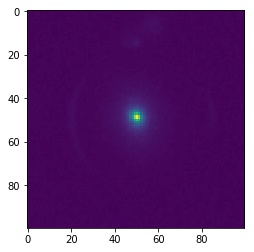

In [ ]:
888






























